In [1]:
# -*- coding: utf-8 -*-

In [2]:
%matplotlib inline
from IPython.display import display

In [3]:
# import io
# from nbformat import current

# def execute_notebook(nbfile):
    
#     with io.open(nbfile) as f:
#         nb = current.read(f, 'json')
    
#     ip = get_ipython()
    
#     for cell in nb.worksheets[0].cells:
#         if cell.cell_type != 'code':
#             continue
#         ip.run_cell(cell.input)

In [4]:
# execute_notebook("speechutils.ipynb")

In [5]:
%run "speechutils.py"

In [6]:
ch = callhome_eval_init("config.json", fast=False)

../../ZRTools/exp/callhome_train_50_evad/matches/config0.80-0.80-0.80-50/master_graph.nodes
Loading prep state dictionary ...
Finished loading prep state dictionary ...
Finished ...
Finished - reading nodes ...
Processing line: 1
Finished - reading edges ...
Removing duplicates in pairs list
Set length: 1986 and List length: 2817
Generating vocabulary of English words ... 
Finished vocab ...
Generating initial belief over English translations
Processed 1 nodes
Generating similarity between nodes based on English translations ...
Finished generating similarity ...
Generating similarity between nodes based on English translations ...
Finished generating similarity ...
Processing line: 1
Total matches: 1986
matches with missing transcriptions: 0
matches with only sil, sp: 66
Finished - evaluating 1986 pairs ...
Setting up eval data frame
Finished ...
Saving state dictionary ...
Finished saving state dictionary ...
Total wav files: 9165
+--------------------------------------+-------------

In [7]:
df_zrt, cols_to_show = ch.gen_zrt_df()

# Analyse ZRT output

### Set up visualizations

In [8]:
pd.options.display.float_format = '{:,.3f}'.format

In [9]:
df_zrt[cols_to_show].head(3)

,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
0,1,2,0.930,EN DONDE,EN DONDE,1,1.000,0,0.000,0.930,1.049.040,1.049.040
1,3,4,0.864,DONDE,ASUNTO sp DE,0,0.250,0,0.000,0.778,1.049.040,2.063.164
2,3,6,0.866,DONDE,DONDE ERA,1,0.000,0,0.000,0.779,1.049.040,1.106.118


## Pairs discovered

### Filter Pairs

In [59]:
# Pairs with no matches in ES transcripts or only ['sil','sp'] matches
df_no_mtch_sil_only = df_zrt[(df_zrt['no_mtch'] == True) | (df_zrt['sil_only'] == True)]
# Pairs only ['sil','sp'] matches
df_sil_only = df_zrt[(df_zrt['sil_only'] == True)]
# Pairs with no matches in ES transcripts, but no ['sil','sp'] detected
df_no_mtch_not_sil = df_zrt[(df_zrt['no_mtch'] == True) & (df_zrt['sil_only'] == False)]

# Pairs with ES words found for both nodes
df_valid = df_zrt[(df_zrt['no_mtch'] == False) & (df_zrt['sil_only'] == False)]

# Filtering two files:
# df_valid = df_valid[df_valid.apply(lambda row: remove_invalid_files(row), axis=1)]
# df_valid = df_valid[df_valid['dur'] > 600]

out_t = PrettyTable(["Description", "# of pairs"], hrules=True)
out_t.align['Description'] = 'r'
out_t.add_row(["Total pairs", len(df_zrt)])
out_t.add_row(["With sil, sp, or no matches", len(df_no_mtch_sil_only)])
out_t.add_row(["Pairs with speech segments and ES words", len(df_valid)])
print(out_t)

+-----------------------------------------+------------+
|                             Description | # of pairs |
+-----------------------------------------+------------+
|                             Total pairs |    1986    |
+-----------------------------------------+------------+
|             With sil, sp, or no matches |     66     |
+-----------------------------------------+------------+
| Pairs with speech segments and ES words |    1920    |
+-----------------------------------------+------------+


## Histogram - ZRT values

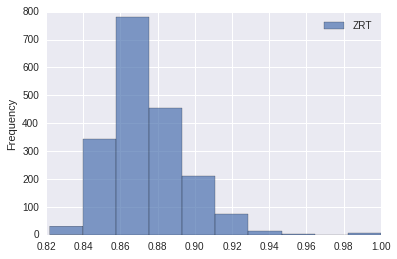

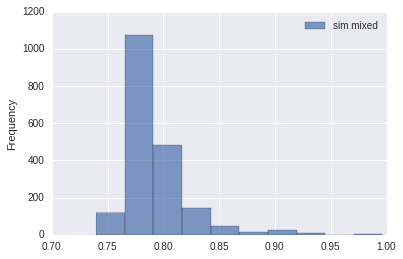

In [11]:
df_valid[['ZRT']].plot(kind='hist', alpha=0.7)
df_valid[['sim mixed']].plot(kind='hist', alpha=0.7)

## Correlation between DTW and other metrics

In [45]:
display(df_valid[['ZRT', 'EN sim']].corr())
display(df_valid[['ZRT', 'ES phone edit sim']].corr())
display(df_valid[['ZRT', 'ES cont match']].corr())
display(df_valid[['ZRT', 'ES word match']].corr())
display(df_valid[['ES phone edit sim', 'ES word match']].corr())

,ZRT,EN sim
ZRT,1.000,0.335
EN sim,0.335,1.000


,ZRT,ES phone edit sim
ZRT,1.000,0.286
ES phone edit sim,0.286,1.000


,ZRT,ES cont match
ZRT,1.000,0.427
ES cont match,0.427,1.000


,ZRT,ES word match
ZRT,1.000,0.342
ES word match,0.342,1.000


,ES phone edit sim,ES word match
ES phone edit sim,1.000,0.571
ES word match,0.571,1.000


# Long matches

In [12]:
long_dur_ms = 600
df_long_dur = df_valid[df_valid['dur'] >= long_dur_ms]
print("# of pairs with duration >= %dms : %d" % (long_dur_ms, len(df_long_dur)))
df_long_dur[cols_to_show].head(3)

# of pairs with duration >= 600ms : 84


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
0,1,2,0.930,EN DONDE,EN DONDE,1,1.000,0,0.000,0.930,1.049.040,1.049.040
94,70,74,0.853,CONSTITUCIóN,CONSTITUCIóN,1,1.000,1,0.000,0.853,2.050.048,2.050.048
95,70,78,0.910,CONSTITUCIóN,QUE HABRá,0,0.000,0,0.000,0.910,2.050.048,2.050.048


### Transcription error?

Pair id: 94 shows errors in transcriptions. The word "CONSTITUCIóN" has a duration greater than 1 sec in the transcription. This does not match the source audio file.

In [13]:
display(ch.play_pair_wav(94))
display(ch.play_node_wav(70))
display(ch.play_node_wav(74, detail=True))
# display(ch.play_node_wav(209))
# display(ch.play_node_wav(210))
display(ch.play_node_source_wav(70))

Playing evaluation pair id: 94
Pair text details
+---------+---------------+----------------------------------------------------+
| node id | ES transcript |                   EN translation                   |
+---------+---------------+----------------------------------------------------+
|    70   |  CONSTITUCIóN |   the pld has proposed to call for the house of    |
|         |               | representatives to approve a new constitution that |
|         |               |    says that the reelection of the president is    |
|         |               |   prohibited in consecutive terms and that there   |
|         |               |             will be separate elections             |
+---------+---------------+----------------------------------------------------+
|    74   |  CONSTITUCIóN |   the pld has proposed to call for the house of    |
|         |               | representatives to approve a new constitution that |
|         |               |    says that the reelection of t

Playing node id: 70
Transcript + Translation details
+---------+---------------+----------------------------------------------------+
| node id | ES transcript |                   EN translation                   |
+---------+---------------+----------------------------------------------------+
|    70   |  CONSTITUCIóN |   the pld has proposed to call for the house of    |
|         |               | representatives to approve a new constitution that |
|         |               |    says that the reelection of the president is    |
|         |               |   prohibited in consecutive terms and that there   |
|         |               |             will be separate elections             |
+---------+---------------+----------------------------------------------------+
Node details
+---------+------------+--------+-----------+---------+---------+
| node id | uttrnce id | spk id | start(ms) | end(ms) | dur(ms) |
+---------+------------+--------+-----------+---------+---------+
|    70

Playing node id: 74
Transcript + Translation details
+---------+---------------+----------------------------------------------------+
| node id | ES transcript |                   EN translation                   |
+---------+---------------+----------------------------------------------------+
|    74   |  CONSTITUCIóN |   the pld has proposed to call for the house of    |
|         |               | representatives to approve a new constitution that |
|         |               |    says that the reelection of the president is    |
|         |               |   prohibited in consecutive terms and that there   |
|         |               |             will be separate elections             |
+---------+---------------+----------------------------------------------------+
Node details
+---------+------------+--------+-----------+---------+---------+
| node id | uttrnce id | spk id | start(ms) | end(ms) | dur(ms) |
+---------+------------+--------+-----------+---------+---------+
|    74

File: ../../corpora/callhome_es/out/050.048.wav 


In [14]:
print(ch.calc_node_overlap(70, 74))

0.386363636364


## Phoneme Similarity

For high DTW score pairs, the phone similarity score should be high as well.

Conversely, if phone similarity is very low, the pair may not be a good match.

### High phoneme score

Pairs with high phoneme similarity score: 490


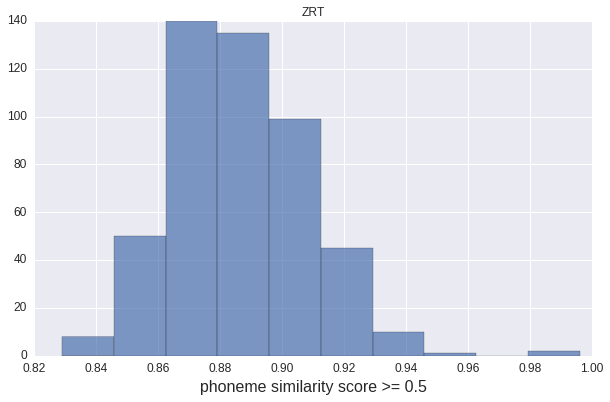

In [18]:
df_phone_score_hi = df_valid[(df_valid['ES phone edit sim'] >= 0.5)]
print("Pairs with high phoneme similarity score: %d" % len(df_phone_score_hi))

f, ax = plt.subplots(figsize=(10, 6))
df_phone_score_hi[['ZRT']].hist(ax=ax, alpha=0.7)
ax.set_xlabel('phoneme similarity score >= 0.5', fontsize=16)
# sns.rugplot(df_phone_score_0['ZRT'], color="b", ax=ax)
plt.tick_params(which='both', labelsize=12)
# plt.colorbar(aplot)

In [19]:
df_phone_score_hi[cols_to_show].head(3)

,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
0,1,2,0.930,EN DONDE,EN DONDE,1,1.000,0,0.000,0.930,1.049.040,1.049.040
10,7,8,0.883,NOSOTROS NOS VAMOS,NOSOTROS VAMOS,1,0.583,1,0.000,0.795,2.049.068,2.049.088
11,8,10,0.886,NOSOTROS VAMOS,NOSOTROS NOS VAMOS,1,0.636,1,0.000,0.797,2.049.088,2.049.068


In [20]:
ch.play_pair_wav(10)

Playing evaluation pair id: 10
Pair text details
+---------+--------------------+-------------------------------------------------+
| node id |   ES transcript    |                  EN translation                 |
+---------+--------------------+-------------------------------------------------+
|    7    | NOSOTROS NOS VAMOS |           eh we are leaving on eighth           |
+---------+--------------------+-------------------------------------------------+
|    8    |   NOSOTROS VAMOS   | and we are first going to holland as we want to |
|         |                    |            relive our honeymoon trip            |
+---------+--------------------+-------------------------------------------------+
Similarity metrics
+----------------------------------------+------------------+
|            Similarity Type             | Similarity Value |
+----------------------------------------+------------------+
|                  ZRT                   |      0.883       |
+-------------------

## Low phoneme score

Pairs with 0 phoneme similarity score: 391


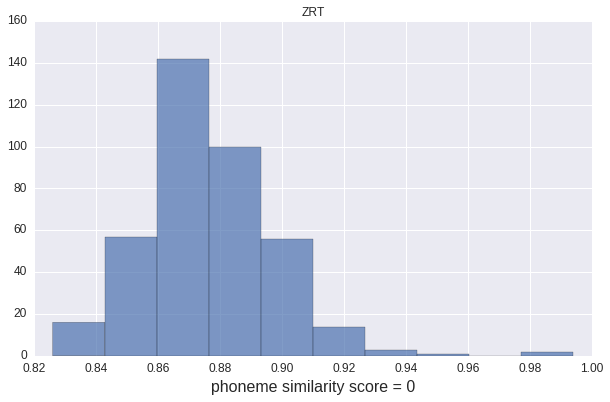

In [21]:
df_phone_score_0 = df_valid[(df_valid['ES phone edit sim'] == 0)]
print("Pairs with 0 phoneme similarity score: %d" % len(df_phone_score_0))

f, ax = plt.subplots(figsize=(10, 6))
df_phone_score_0[['ZRT']].hist(ax=ax, alpha=0.7)
ax.set_xlabel('phoneme similarity score = 0', fontsize=16)
# sns.rugplot(df_phone_score_0['ZRT'], color="b", ax=ax)
plt.tick_params(which='both', labelsize=12)
# plt.colorbar(aplot)

** Analysis:** The plot shows a lot of high DTW score pairs where there is no match in the phonemes

In [22]:
df_phone_score_0_high_dtw = df_phone_score_0[df_phone_score_0['ZRT'] > 0.87]
print("Pairs with high DTW and 0 phoneme similarity score: %d" % len(df_phone_score_0_high_dtw))

display(df_phone_score_0_high_dtw[cols_to_show].head(3))
# ch.play_pair_wav(28)

Pairs with high DTW and 0 phoneme similarity score: 235


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
37,44,429,0.884,YA MáS DE UNA,EN ENDA NO TIENE,0,0.000,0,0.000,0.796,1.096.031,2.050.142
52,51,52,0.892,EL EL DECIR,HABLAMOS,0,0.000,0,0.000,0.803,2.049.198,2.078.111
53,52,1122,0.889,HABLAMOS,EL EL DECIR,0,0.000,0,0.000,0.800,2.078.111,2.049.198


In [23]:
df_phone_score_0_en_score_0 = df_phone_score_0[df_phone_score_0['EN sim'] == 0]
print("Pairs with 0 phoneme score and 0 EN sim: %d" % len(df_phone_score_0_en_score_0))
# display(df_phone_score_0_en_score_0[cols_to_show][df_phone_score_0_en_score_0['ZRT'] < 0.82].head(3))
display(df_phone_score_0_en_score_0[cols_to_show].head(3))

df_phone_score_0_high_dtw_en_score_0 = df_phone_score_0_high_dtw[df_phone_score_0_high_dtw['EN sim'] == 0]
print("Pairs with high DTW and 0 phoneme score and 0 EN sim: %d" % len(df_phone_score_0_high_dtw_en_score_0))
display(df_phone_score_0_high_dtw_en_score_0[cols_to_show].head(3))

Pairs with 0 phoneme score and 0 EN sim: 281


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
2,3,6,0.866,DONDE,DONDE ERA,1,0.000,0,0.000,0.779,1.049.040,1.106.118
26,31,34,0.865,Sé YO DE ESO,AHí MI MAMI sp,0,0.000,0,0.000,0.778,1.049.158,1.104.092
27,31,3549,0.865,Sé YO DE ESO,AHí MI MAMI sp,0,0.000,0,0.000,0.778,1.049.158,1.104.092


Pairs with high DTW and 0 phoneme score and 0 EN sim: 153


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
37,44,429,0.884,YA MáS DE UNA,EN ENDA NO TIENE,0,0.000,0,0.000,0.796,1.096.031,2.050.142
52,51,52,0.892,EL EL DECIR,HABLAMOS,0,0.000,0,0.000,0.803,2.049.198,2.078.111
53,52,1122,0.889,HABLAMOS,EL EL DECIR,0,0.000,0,0.000,0.800,2.078.111,2.049.198


In [25]:
# display(ch.play_pair_wav(594, detail=True))
display(ch.play_pair_wav(52, detail=False))
# display(ch.play_node_source_wav(131))

Playing evaluation pair id: 52
Pair text details
+---------+---------------+----------------------------------------------------+
| node id | ES transcript |                   EN translation                   |
+---------+---------------+----------------------------------------------------+
|    51   |  EL EL DECIR  | saying that if you didnt sign up here and all that |
|         |               |                 but theyll do that                 |
+---------+---------------+----------------------------------------------------+
|    52   |    HABLAMOS   |  ah yes we have a language also we the andalusian  |
|         |               | are the people who speak the best spanish language |
|         |               |   see that from the ancient castilian there are    |
|         |               |      unknown words we are continually taking       |
+---------+---------------+----------------------------------------------------+
Similarity metrics
+----------------------------------------

In [ ]:
ch.file_info_dict["049.156"].source_file

In [ ]:
# !soxi ../../corpora/callhome_es/out/006.183.wav
# !play ../../corpora/callhome_es/out/006.183.wav trim 1.24
# IPython.display.Audio("../../corpora/callhome_es/out/tmp/sp_0731_1.wav")

### Conclusion

**Pairs with high DTW and 0 phoneme and 0 EN word similarity indicate transcription errors or coding errors**


**Need to investigate**

### High Phoneme similarity

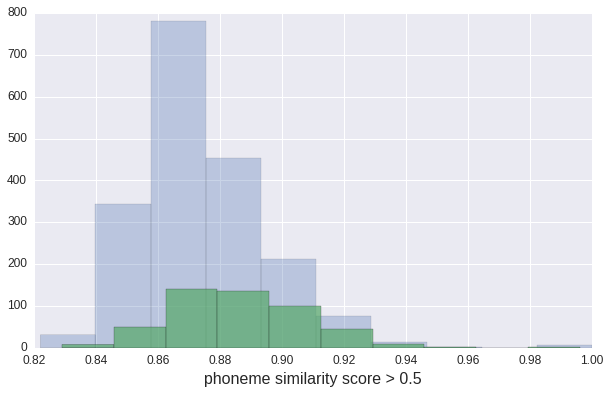

In [26]:
# df_phone_score_hi = df_valid[(df_valid['ES phone edit sim'] >= 0.5)]
# print("Pairs with high phoneme similarity score: %d" % len(df_phone_score_hi))

f, ax = plt.subplots(figsize=(10, 6))
df_valid['ZRT'].hist(ax=ax, alpha=0.3)
df_phone_score_hi['ZRT'].hist(ax=ax, alpha=0.7)
ax.set_xlabel('phoneme similarity score > 0.5', fontsize=16)
# sns.rugplot(df_phone_score_0['ZRT'], color="b", ax=ax)
plt.tick_params(which='both', labelsize=12)
# plt.colorbar(aplot)

In [29]:
df_phone_score_hi_en_score_0 = df_phone_score_hi[(df_phone_score_hi['EN sim'] == 0) & \
                                                (df_phone_score_hi['spk1'] != df_phone_score_hi['spk2'])]
print("Pairs with high phoneme score and 0 EN sim: %d" % len(df_phone_score_hi_en_score_0))

df_phone_score_hi_en_score_0[cols_to_show].head(5)

Pairs with high phoneme score and 0 EN sim: 191


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
10,7,8,0.883,NOSOTROS NOS VAMOS,NOSOTROS VAMOS,1,0.583,1,0.000,0.795,2.049.068,2.049.088
11,8,10,0.886,NOSOTROS VAMOS,NOSOTROS NOS VAMOS,1,0.636,1,0.000,0.797,2.049.088,2.049.068
70,69,86,0.876,sp EH,PARECE,0,0.500,0,0.000,0.788,2.050.006,2.050.163
72,69,94,0.829,sp EH,EH,1,0.500,1,0.000,0.746,2.050.006,2.076.163
73,69,96,0.854,sp EH,EN,0,0.500,0,0.000,0.769,2.050.006,1.084.053


In [31]:
ch.play_pair_wav(70)

Playing evaluation pair id: 70
Pair text details
+---------+---------------+--------------------------------------------------+
| node id | ES transcript |                  EN translation                  |
+---------+---------------+--------------------------------------------------+
|    69   |     sp EH     | oh yes i sent you a letter and some documents oh |
|         |               | so theres some really interesting information in |
|         |               | the last number of rumbos magazine that is about |
+---------+---------------+--------------------------------------------------+
|    86   |     PARECE    |   im now i had a headache because the heat was   |
|         |               | terrible in this romana road its like everything |
|         |               |       is grey the grass everything is dry        |
+---------+---------------+--------------------------------------------------+
Similarity metrics
+----------------------------------------+------------------+
|

## High DTW score, Low EN translation similarity

These are expected to be phonetically similary but semantically different pairs.

**Label Spreading** should help **lower** the DTW score

1270


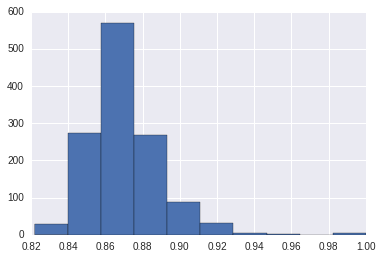

In [32]:
df_valid['ZRT'][(df_valid['EN sim'] == 0)].hist()
print(len(df_valid['ZRT'][(df_valid['EN sim'] == 0)]))

In [36]:
df_high_dtw_0_en = df_valid[(df_valid['ZRT'] > 0.87) & (df_valid['EN sim'] == 0) & \
                                                (df_valid['spk1'] != df_valid['spk2'])]

In [38]:
print("Pairs with high DTW annd 0 EN sim: %d" % len(df_high_dtw_0_en))
df_high_dtw_0_en[cols_to_show].head(5)

Pairs with high DTW annd 0 EN sim: 497


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
10,7,8,0.883,NOSOTROS NOS VAMOS,NOSOTROS VAMOS,1,0.583,1,0.000,0.795,2.049.068,2.049.088
11,8,10,0.886,NOSOTROS VAMOS,NOSOTROS NOS VAMOS,1,0.636,1,0.000,0.797,2.049.088,2.049.068
22,27,28,0.895,MAMá ANDA POR,LLEGUEN LO MáS RáPIDO,0,0.250,0,0.000,0.805,1.049.140,1.049.177
23,28,44,0.882,LLEGUEN LO MáS RáPIDO,YA MáS DE UNA,1,0.250,0,0.000,0.794,1.049.177,1.096.031
37,44,429,0.884,YA MáS DE UNA,EN ENDA NO TIENE,0,0.000,0,0.000,0.796,1.096.031,2.050.142


In [ ]:
display(ch.play_pair_wav(0, detail=True))

In [ ]:
# !play ../../corpora/callhome_es/out/001.202.wav trim .75 =.99

## Low DTW score, High EN translation similarity

These are expected to be semantically similar but phonetically not very similar.

**Label Spreading** should help **increase** the DTW score

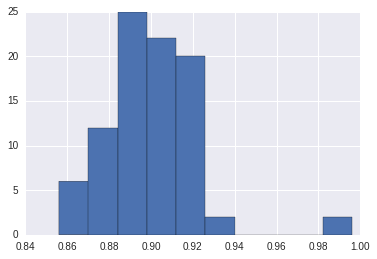

In [39]:
df_valid['ZRT'][(df_valid['EN sim'] >= 0.2)].hist()

In [40]:
df_low_dtw_high_en = df_valid[(df_valid['ZRT'] < 0.88) & (df_valid['EN sim'] >= 0.2)]

In [41]:
print("Pairs with high DTW annd 0 EN sim: %d" % len(df_low_dtw_high_en))
df_low_dtw_high_en[cols_to_show].tail()

Pairs with high DTW annd 0 EN sim: 13


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
1374,2015,2016,0.877,NO HA LLAMADO POR ASUNTO,TE HA LLAMADO A sp,1,0.538,1,0.500,0.839,1.091.219,1.091.217
1736,4459,4460,0.872,A MI LADO TE QUIERE SALUDAR,A MI LADO TE QUIERE SALUDAR,1,1.000,1,0.312,0.816,1.056.057,1.056.258
1737,4459,4493,0.872,A MI LADO TE QUIERE SALUDAR,A MI LADO TE QUIERE SALUDAR,1,1.000,1,0.312,0.816,1.056.057,1.056.258
1830,4951,4952,0.878,PERO SE VE BIEN,SE VE BIEN,1,0.667,1,0.257,0.816,1.061.083,1.061.085
1833,4952,4958,0.878,SE VE BIEN,PERO SE VE BIEN,1,0.667,1,0.257,0.816,1.061.085,1.061.083


In [42]:
ch.play_pair_wav(1374, detail=True)

Playing evaluation pair id: 1374
Pair text details
+---------+--------------------------+---------------------------------------------+
| node id |      ES transcript       |                EN translation               |
+---------+--------------------------+---------------------------------------------+
|   2015  | NO HA LLAMADO POR ASUNTO | yeah but has not called me for a work issue |
+---------+--------------------------+---------------------------------------------+
|   2016  |    TE HA LLAMADO A sp    |      hasn´t called you for a work issue     |
+---------+--------------------------+---------------------------------------------+
Similarity metrics
+----------------------------------------+------------------+
|            Similarity Type             | Similarity Value |
+----------------------------------------+------------------+
|                  ZRT                   |      0.877       |
+----------------------------------------+------------------+
|         ES content* wor

## Precision / Recall

In [ ]:
ch.eval_precision_recall()

In [ ]:
ch.eval_precision_recall(sim_col='sim mixed')

# eval scores: 1920
# good scores: 311
#  bad scores: 1609
Average Precision - using sim: zrt_sim
----------------------------------------
	0.47163
----------------------------------------
# eval scores: 1920
# good scores: 311
#  bad scores: 1609
Average Precision - using sim: sim mixed
----------------------------------------
	0.64314
----------------------------------------


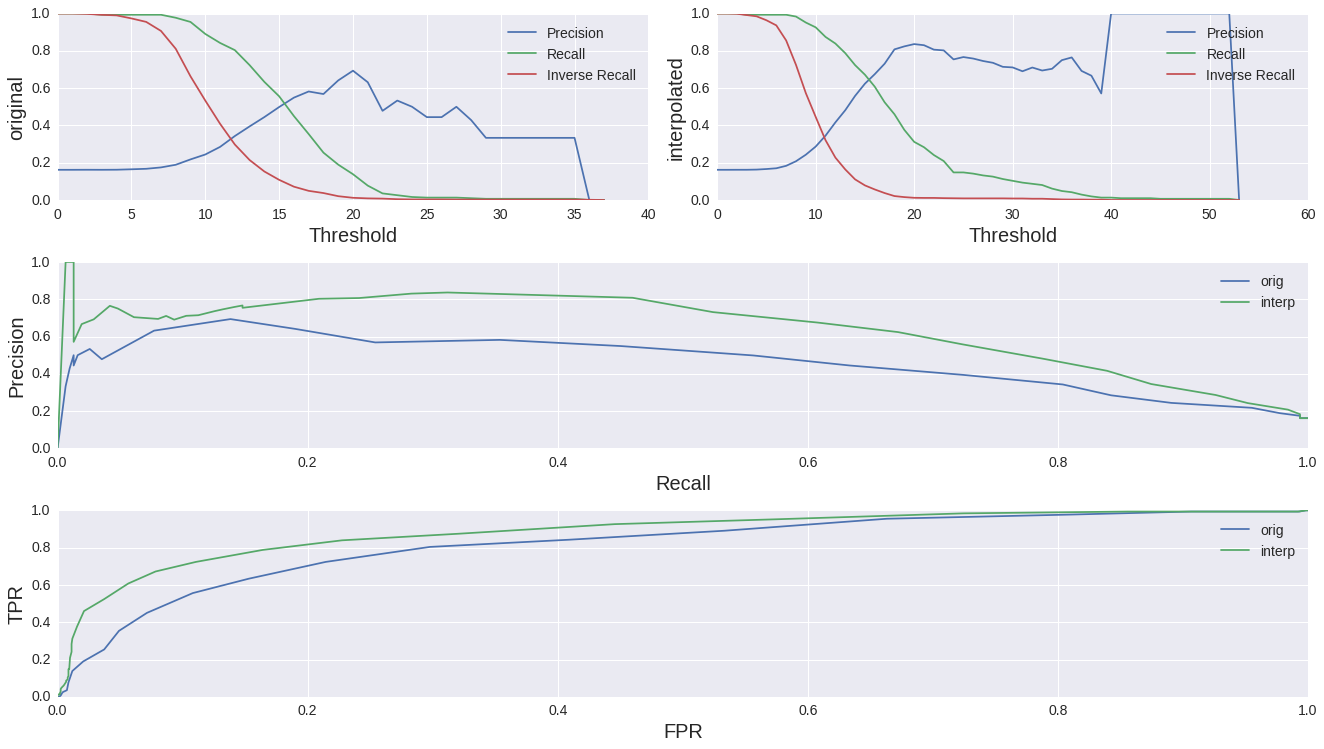

In [43]:
ch.plot_precision_recall(both=True)

## Cross-utterance matches

In [64]:
# df_valid.columns
df_cross_spkr = df_valid[df_valid.apply(lambda row: row['spk1'].rsplit('.', 1)[0] != \
                                   row['spk2'].rsplit('.', 1)[0], \
                                   axis=1)]
print("# of cross-speaker pairs: %d" % (len(df_cross_spkr)))
df_cross_spkr[cols_to_show].head(3)

# of cross-speaker pairs: 1374


,n1,n2,ZRT,ES words n1,ES words n2,ES word match,ES phone edit sim,ES cont match,EN sim,sim mixed,spk1,spk2
1,3,4,0.864,DONDE,ASUNTO sp DE,0,0.250,0,0.000,0.778,1.049.040,2.063.164
2,3,6,0.866,DONDE,DONDE ERA,1,0.000,0,0.000,0.779,1.049.040,1.106.118
3,4,314,0.835,ASUNTO sp DE,ESTE,0,0.250,0,0.000,0.751,2.063.164,2.106.025


## Label Spreading - speech pair similarity score update using English translations

In [ ]:
ch.label_prop_edges.label_spread(ch.en_w_hgr_sim_0)

In [ ]:
print(ch.label_prop_edges.belief_0[1])
print(ch.label_prop_edges.belief_n[1])
print(ch.en_w_hgr_sim_0[1], ch.en_w_hgr_sim_0[2])

In [ ]:
df_valid[cols_to_show].sort_values(['ZRT'], ascending=False)

In [ ]:
display(ch.play_pair_wav(84, detail=True))

In [ ]:
(0.9 * 0.8) + (0.1 * 0.7)

In [ ]:
df_valid.columns

In [ ]:
sns.jointplot(x='ZRT', y='ES cont match', data=df_valid, kind='kde')

In [ ]:
%%timeit -n1 -r1
ch_eval.label_prop_en_words.label_spread(ch_eval.edges_dict)
print(ch_eval.edges_dict[1])
print(ch_eval.en_w_belief[1])
print(ch_eval.en_w_belief[2])
print(ch_eval.label_prop_en_words.belief_0[1])
print(ch_eval.label_prop_en_words.belief_n[1])

print(len(ch_eval.en_vocab))
print(sorted(ch_eval.en_words_stats.items(), reverse=True, key= lambda x: x[1])[:5])
print(ch_eval.en_w_sim_0[1])
print(ch_eval.label_prop_en_words.belief_0[1])
print(ch_eval.label_prop_en_words.belief_n[1])
print(ch_eval.label_prop_en_words.belief_0[2])
print(ch_eval.label_prop_en_words.belief_n[2])